#**Lab #9. Interactive Visualization of Geographical Data** 

Many datasets contain information linked to locations in the physical world. 
How can we visualize information about location with specific attributes (such as income, age, or educational attainment)? It can be helpful to visualize the data in their proper geospatial context, i.e., to show the data on a realistic map or alternatively as a map-like diagram.


## Learning Objectives

In Lab #9, we will learn (1) how to visualize the choropleth map, (2) how to visualize plots on geographical map and (3) how to cluster and visualize mobility data.

#**Choropleth Map**

A choropleth map is a map of a region with different divisions colored to indicate the value of a specific feature in that division. This division may be a country, state, district, or any other well-documented area. 

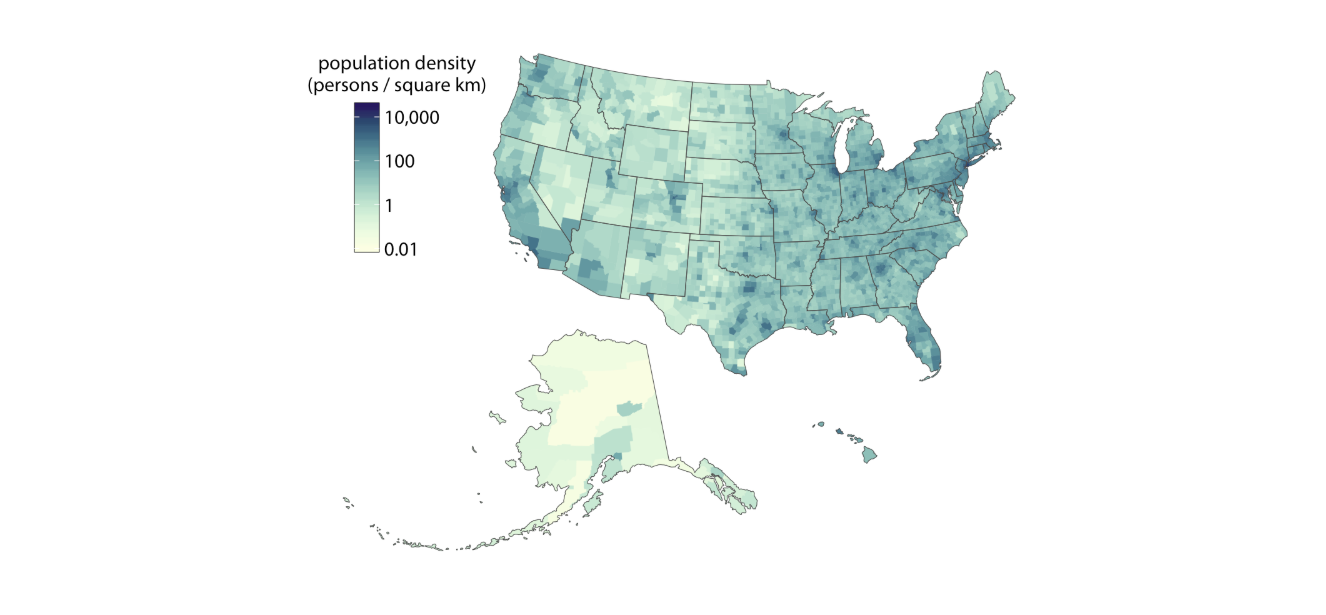

##Dataset: Our World in Data

We are going to use the internet usage statistics published on *Our World in Data* and present the percentage of the population using the Internet in each country from 1990 to 2017. 

![대체 텍스트](https://drive.google.com/uc?export=view&id=1bSQHUbADdJO309RVShUMY6DFa-mXZIhI)

* ISO 3166 country code:  Internationally recognized codes that designate every country in the world

  ex) AFG- Afghanistan, AGO- Angola

## Generating a worldwide choropleth map

We are going to create a choropleth map that shows the persentage of population of Internet usage in 2016. Since the DataFrame contains records from multiple years, let's first select a subset of the data, i.e., one specific year, say, 2016. We'll then use this subset to generate a world-wide map. 

1. Import a Python module, pandas: 

In [270]:
import pandas as pd

2. Read the data from the .csv file: 

In [271]:
internet_usage_url = "https://raw.githubusercontent.com/TrainingByPackt/Interactive-Data-Visualization-with-Python/master/datasets/share-of-individuals-using-the-internet.csv"
internet_usage_df = pd.read_csv(internet_usage_url)
internet_usage_df.head()

,Country,Code,Year,Individuals using the Internet (% of population)
0,Afghanistan,AFG,1990,0.000000
1,Afghanistan,AFG,2001,0.004723
2,Afghanistan,AFG,2002,0.004561
3,Afghanistan,AFG,2003,0.087891
4,Afghanistan,AFG,2004,0.105809


3. Select one specific year from the data since the DataFrame contains records of multiple years: 

In [272]:
internet_usage_2016 = internet_usage_df.loc[internet_usage_df['Year']==2016]
internet_usage_2016.head()

,Country,Code,Year,Individuals using the Internet (% of population)
16,Afghanistan,AFG,2016,10.595726
39,Albania,ALB,2016,66.363445
63,Algeria,DZA,2016,42.945527
85,Andorra,AND,2016,97.930637
107,Angola,AGO,2016,13.000000


For the next steps, we're going to use the express module (for its simplicity) from plotly and use the choropleth function from the module. The first argument passed to this function is the DataFrame that we want to visualize. The following parameters are set:

* locations: This is set to the name of the column in the DataFrame that contains the ISO 3166 country codes. 

* color: This is set to the name of the column that contains the numerical feature using which the map is to be color-coded. 

* hover_name: This is set to the name of the column that contains the feature to be displayed while hovering over the map. 

* color_continuous_scale: This is set to a color scheme, such as Blues | Reds | Greens | px.colors.sequential.Plasma.

4. Generate an interactive world-wide choropleth map using choropleth function of plotly library: 

In [273]:
import plotly.express as px

fig = px.choropleth(internet_usage_2016,
                    locations="Code", # colunm containing ISO 3166 country codes
                    color="Individuals using the Internet (% of population)", # column by which to color-code
                    hover_name="Country", # column to display in hover information
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.show()

On this map, you can try various functions such as hovering and zooming in/out. Let's explore the interactivity of a choropleth map through the following exercise.

BTW, you can draw similar plots using Altair: https://altair-viz.github.io/gallery/index.html#maps  or Bokeh: https://cbouy.github.io/2019/06/09/interactive-map.html

##  Tweaking a Worldwide Choropleth Map 

We will make several simple changes to the layout of the choropleth map, such as changing the map projection from flat to natural earth, zooming into a specific region, adding text to the map using the update_layout function, and adding a rotation feature. 

1. Set geo_scope to asia in the update_layout function to zoom into the asia region. 

In [274]:
import plotly.express as px
fig = px.choropleth(internet_usage_2016,
                    locations="Code",
                    color="Individuals using the Internet (% of population)", 
                    hover_name="Country", 
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.update_layout(
    title_text = 'Internet usage across the Asian Continent (% population) - 2016',
    geo_scope = 'asia' 
    #One of 'world', 'usa', 'europe', 'asia', 'africa', 'north america', or 'south america'. (Default is 'world')
)

fig.show()

2. Set projection type to natural earth: 

In [275]:
import plotly.express as px
fig = px.choropleth(internet_usage_2016,
                    locations="Code",
                    color="Individuals using the Internet (% of population)", 
                    hover_name="Country", 
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.update_layout(
    title_text = 'Internet usage across the world (% population) - 2016',
    geo = dict(projection={'type':'natural earth'}) 
    #One of 'equirectangular', 'mercator', 'orthographic', 'natural earth', 
    #'kavrayskiy7', 'miller', 'robinson', 'eckert4', 'azimuthal equal area', 
    #'azimuthal equidistant', 'conic equal area', 'conic conformal', 'conic equidistant', 
    #'gnomonic', 'stereographic', 'mollweide', 'hammer', 'transverse mercator', 
    #'albers usa', 'winkel tripel', 'aitoff', or 'sinusoidal'`Default depends on `scope.
)

fig.show()

Try dragging the map now. The rotation gives the plot a much more realistic touch! plotly offers many such options to tweak visualizations.

 So far, we have been generating all our plots for the records in a single year, 2016. What about all the other timepoints? 

## Mini-Exercise #1. Adding Animation to a Choropleth Map (5min)

(1) Let's add animation effect so that the choropleth map changes with the year. Remember that **animation_frame** parameter can add the animation if you use plotly.express.

(2) Did you find anything wrong with the result of question (1)? Find the two strange parts and make an improved choropleth map.

* Hint: Look at the order of years on the slider and the range of the colorbar when the slider is moved!
* Visit this site and think about which parameters to add: https://plotly.github.io/plotly.py-docs/generated/plotly.express.choropleth.html

Submission link: https://docs.google.com/document/d/1_1zSrBEIExFYUVq09dbqtlqxw9XqPKsd5wF5e8SAjFI/edit?usp=sharing 

In [276]:
fig = px.choropleth(internet_usage_df,
                    locations="Code",
                    color="Individuals using the Internet (% of population)", 
                    hover_name="Country", 
                    color_continuous_scale=px.colors.sequential.Plasma,
                    animation_frame="Year")
fig.update_layout(
    title_text = 'Internet usage across the world (% population)',
    geo = dict(projection={'type':'natural earth'})
)

fig.show()

Two strange parts
1. color is not fixed from 0 to 100.
2. Year is not sorted.

In [277]:
sorted_internet_usage_df = internet_usage_df.sort_values(by=['Year'])
fig = px.choropleth(sorted_internet_usage_df,
                    locations="Code",
                    color="Individuals using the Internet (% of population)", 
                    hover_name="Country", 
                    color_continuous_scale=px.colors.sequential.Plasma,
                    animation_frame="Year",
                    range_color=(0, 100))
fig.update_layout(
    title_text = 'Internet usage across the world (% population)',
    geo = dict(projection={'type':'natural earth'})
)

fig.show()

#**Plots on Geographical Map**

## Dataset: Walmart store openings dataset

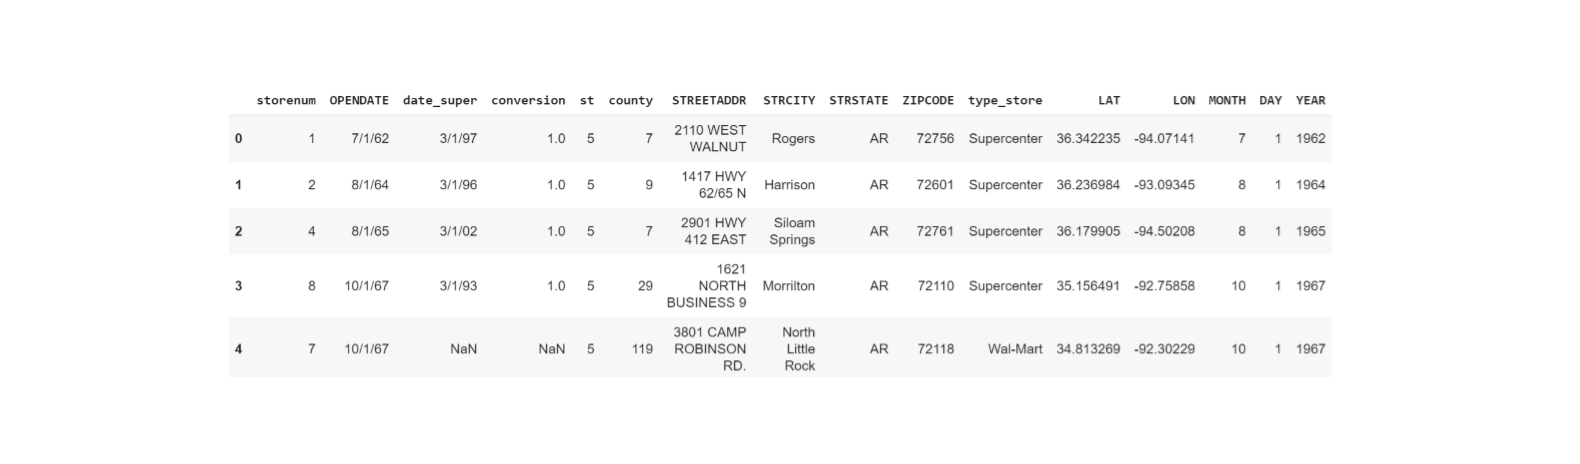

This dataset contains information on all walmarts in the USA from 1962 to 2006. We will create a map from this dataset, and then plot a scatter plot and a bubble plot on the map.

Unlike the above dataset, this dataset **contains only the U.S. scope**, not the global scope. Also, it **contains the latitude and longitude columns** of the Walmart stores. We will display this latitude and longitude on the map.


##Scatter Plots

 To create a scatter plot from this dataset, we'll use the graph_objects module. We'll find a location of interest on the map and we'll assign longitudes and latitudes on that map and find out the number of Walmart store openings for different parts of the US.

1. Import a Python module, pandas:

In [278]:
import pandas as pd

2. Read the data from the URL: 

In [279]:
walmart_locations_url = "https://raw.githubusercontent.com/plotly/datasets/master/1962_2006_walmart_store_openings.csv"
walmart_loc_df = pd.read_csv(walmart_locations_url)
walmart_loc_df.head()

#STR = Store
#STRSTATE = State of a store
#STRCITY = City of a store 

,storenum,OPENDATE,date_super,conversion,st,county,STREETADDR,STRCITY,STRSTATE,ZIPCODE,type_store,LAT,LON,MONTH,DAY,YEAR
0,1,7/1/62,3/1/97,1.0,5,7,2110 WEST WALNUT,Rogers,AR,72756,Supercenter,36.342235,-94.07141,7,1,1962
1,2,8/1/64,3/1/96,1.0,5,9,1417 HWY 62/65 N,Harrison,AR,72601,Supercenter,36.236984,-93.09345,8,1,1964
2,4,8/1/65,3/1/02,1.0,5,7,2901 HWY 412 EAST,Siloam Springs,AR,72761,Supercenter,36.179905,-94.50208,8,1,1965
3,8,10/1/67,3/1/93,1.0,5,29,1621 NORTH BUSINESS 9,Morrilton,AR,72110,Supercenter,35.156491,-92.75858,10,1,1967
4,7,10/1/67,NaN,NaN,5,119,3801 CAMP ROBINSON RD.,North Little Rock,AR,72118,Wal-Mart,34.813269,-92.30229,10,1,1967


We will again be using the plotly.express module to generate our scatter plot on the US map.  We will be passing the longitudes and latitudes of our locations of interest using the lon and lat parameters. 

In [280]:
import plotly.express as px
fig=px.scatter_geo(walmart_loc_df,
                   lon = 'LON',
                   lat = 'LAT', 
                  )

fig.update_layout(
        title = 'Walmart stores across world',
        geo_scope='usa'
        #One of 'world', 'usa', 'europe', 'asia', 'africa', 'north america', or 'south america' (Default is 'world')
        )

fig.show()

 You can see that Walmart is much more prominent in the east of the US than the west of the US. 

##Bubble Plots

Since the eastern side of the map of the USA appears very densely populated with Walmart stores, it might be a good idea to **show an aggregate feature**, such as the count of Walmart stores across the different states. **Bubble plots** are designed for exactly this kind of visualization.
The bubble sizes depend on the value they are indicating – the bigger the value, the bigger the bubble.

1. Use the groupby function to compute the number of Walmart stores per state. 

In [281]:
walmart_stores_by_state = walmart_loc_df.groupby('STRSTATE').count()['storenum'].reset_index().rename(columns={'storenum':'NUM_STORES'})
walmart_stores_by_state.head()

,STRSTATE,NUM_STORES
0,AL,90
1,AR,81
2,AZ,55
3,CA,159
4,CO,56


2. To generate the bubble plots, we will use the plotly express module and the scatter_geo function. Notice how the locations parameter is set to the name of the column that contains state codes, and the size parameter is set to the NUM_ STORES feature: 

In [282]:
import plotly.express as px

fig = px.scatter_geo(walmart_stores_by_state, 
                    locations="STRSTATE", 
                    size="NUM_STORES", 
                    locationmode = 'USA-states',
                    hover_name="STRSTATE",
                    size_max=45)
#locationmode: One of ‘ISO-3’, ‘USA-states’, or ‘country names’ Determines the set of locations used to match entries in locations to regions on the map.
fig.update_layout(
   
    title_text = 'Walmart stores across states in the US',
    geo_scope='usa'
)

fig.show()

##Mini-Exercise #2. Adding Animation to a Bubble plot (5min)

(1) Let's add the animation so that the bubble plot changes with YEAR. Therefore, you need to group the original dataframe again with YEAR and STRSTATE. By doing this, you can visualize the number of stores opened at a specific state over time!

(2) Also, add colorscale to the bubble plot. Make sure that the colorbar's range does not change when you move the slider. 

Submission link: https://docs.google.com/document/d/1swbqNrD8I02TjOJaZ39V8MzH3Q_PYCUh9zsIyReaVpU/edit?usp=sharing

In [283]:
walmart_loc_df.head()

,storenum,OPENDATE,date_super,conversion,st,county,STREETADDR,STRCITY,STRSTATE,ZIPCODE,type_store,LAT,LON,MONTH,DAY,YEAR
0,1,7/1/62,3/1/97,1.0,5,7,2110 WEST WALNUT,Rogers,AR,72756,Supercenter,36.342235,-94.07141,7,1,1962
1,2,8/1/64,3/1/96,1.0,5,9,1417 HWY 62/65 N,Harrison,AR,72601,Supercenter,36.236984,-93.09345,8,1,1964
2,4,8/1/65,3/1/02,1.0,5,7,2901 HWY 412 EAST,Siloam Springs,AR,72761,Supercenter,36.179905,-94.50208,8,1,1965
3,8,10/1/67,3/1/93,1.0,5,29,1621 NORTH BUSINESS 9,Morrilton,AR,72110,Supercenter,35.156491,-92.75858,10,1,1967
4,7,10/1/67,NaN,NaN,5,119,3801 CAMP ROBINSON RD.,North Little Rock,AR,72118,Wal-Mart,34.813269,-92.30229,10,1,1967


In [284]:
grouped_walmart_stores = walmart_loc_df.groupby(['STRSTATE', 'YEAR']).count()['storenum'].reset_index().rename(columns={'storenum':'NUM_STORES'})

In [285]:
grouped_walmart_stores.head()

,STRSTATE,YEAR,NUM_STORES
0,AL,1979,1
1,AL,1980,8
2,AL,1981,28
3,AL,1982,3
4,AL,1983,2


In [286]:
grouped_walmart_stores = grouped_walmart_stores.sort_values(by=['YEAR'])
fig = px.scatter_geo(grouped_walmart_stores, 
                    locations="STRSTATE", 
                    size="NUM_STORES", 
                    locationmode = 'USA-states',
                    hover_name="STRSTATE",
                    size_max=45,
                    color='NUM_STORES',
                    animation_frame='YEAR',
                    range_color=(0, grouped_walmart_stores['NUM_STORES'].max())
                    )
#locationmode: One of ‘ISO-3’, ‘USA-states’, or ‘country names’ Determines the set of locations used to match entries in locations to regions on the map.
fig.update_layout(
   
    title_text = 'Walmart stores across states in the US',
    geo_scope='usa'
)

fig.show()

#**Visualizing & Clustering Mobility Data**


We marked the location of Walmart on the map with a point. Now, we will visualize GPS data on the map, using a library called Mapbox. 

## Dataset: Location traces of K-Emophone Dataset

To handle mobility data, we will use a sample location trace, which consists of a series of GPS coordinates (i.e., latitude and longitude) and collection timestamps. We will utilize one user's data (P714) in K-emophone dataset.

In [287]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Read the csv file and save in into the LOCATION dataframe.

In [288]:
import pandas as pd
LOCATION=pd.read_csv('/content/drive/My Drive/CS481_Data Visualization/P714_location.csv')
LOCATION=LOCATION[['timestamp','latitude', 'longitude']]
LOCATION.head()

,timestamp,latitude,longitude
0,1557274207854,36.373779,127.357210
1,1557274267935,36.373821,127.357181
2,1557274439100,36.373746,127.357165
3,1557274489940,36.373789,127.357184
4,1557274949391,36.373724,127.357276


##What is mapbox?

![대체 텍스트](https://drive.google.com/uc?export=view&id=13YSOVVBRJXgwsMMBjDg11GKlG4IgLwwD)

Mapbox is a platform used across industries to create custom applications that solve problems with maps, data, and spatial analysis. You can make your own style of map freely!

2. Let's visualize the GPS data on the map. 


*   go.Scattermapbox() method: It construct a new Scattermapbox object. The data visualized as scatter points on a geographic map. It is provided by longitude/latitude pairs in lon and lat.

If you want to know more parameters, refer to this document: https://plotly.com/python-api-reference/generated/plotly.graph_objects.Scattermapbox.html



In [289]:
import plotly.graph_objs as go

#@markdown For drawing GPS coordinates, we need a [MapBox](https://mapbox.com)'s access token. 
MAPBOX_ACCESS_TOKEN = 'pk.eyJ1Ijoia2VsdHBvd2VyMCIsImEiOiJjazFiZ3cxZzUwMjVhM2hyMTBvcHYwcHlxIn0.mZTYvOHmJeqBANdFC1HFkw' #@param {type:"string"}

fig = go.Figure()

#We will use Scattermapbox() function and defind latitude and longitude parameter
fig.add_trace(
    go.Scattermapbox(
        lat=LOCATION.loc[:, 'latitude'],
        lon=LOCATION.loc[:, 'longitude']
    )
)

fig.update_layout(
    autosize=True,
    mapbox=go.layout.Mapbox(
        accesstoken=MAPBOX_ACCESS_TOKEN,
        center=go.layout.mapbox.Center(
            #set the first low as the center
            lat=LOCATION.loc[0, 'latitude'],
            lon=LOCATION.loc[0, 'longitude'],
        ),
        zoom=12
    )
)
fig.show()


Let's change the style of the map. It is a function supported by mapbox! (It needs MAPBOX_ACCESS_TOKEN)

There are several kinds of style: 
"white-bg", "open-street-map", "carto-positron", "carto-darkmatter", "stamen-terrain", "stamen-toner", "stamen-watercolor", "basic", "streets", "outdoors", "light", "dark", "satellite", or "satellite-streets"

Change the map into different styles!

In [290]:
fig.update_layout(mapbox_style= "satellite")

In [291]:
fig.update_layout(mapbox_style= "open-street-map")

## Clustering GPS Coordinates



* The purpose of clustering GPS coordinates is to find informative locations, where people often visit or stay.
* For clustering, we should define the distance metric that measures distance between two data points.
* After completion of clustering, we need to name each cluster. For a given GPS point, we can say which cluser it belongs to. 

We will take a look at a spatial clustering algorithm, called DBSCAN in the following. 

**What is DBSCAN?** (Density-based spatial clustering of applications with noise)

![대체 텍스트](https://drive.google.com/uc?export=view&id=1_Wc3-BzjKBMedF8g2CYMAFmTGfCxiglL)

* Refer to: https://docs.google.com/presentation/d/1gAxDOueKJmqUjpiCkceijqaqEyAI1BiDFYZTTCHijZQ/edit?usp=sharing


* DBSCAN is one of most popular clustering algorithms, where a cluster is built if a point has *sufficient amount of other points within a given distance*.
* Here, the points within a given distance is called *neighborhood*.
* In this algorithm, we basically define three parameters:
  * $\epsilon$: A distance to determine two points are neighborboods.
  * $pt_{min}$: the mininum number of neighborhoods for a given point to be considered as a center of a cluster.
  * Distance metric: metrics to measure distance between two points.
* The Euclidean distance is widely-used; but, for GPS coordinates, we should use [Haversine distance](https://en.wikipedia.org/wiki/Haversine_formula) (distance between two points on the sphere)

![대체 텍스트](https://drive.google.com/uc?export=view&id=1T9T47qrcd_fe38drwgcagXXaZx7gy73w)

In [292]:
import plotly.graph_objs as go
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd

EPSILON_METRE = 50 #@param {type:"slider", min:25, max:500, step:25}
MIN_POINTS = 5 #@param {type:"slider", min:5, max:30, step:1}
R = 63710088 # Earth radius in metre

cluster = DBSCAN(eps=EPSILON_METRE / R,
                 #The maximum angle between two samples  
                 min_samples=MIN_POINTS, 
                 #The number of samples in a neighborhood for a point to be considered as a core point.
                 metric='haversine'
                 )

loc_degrees = LOCATION.loc[:, ['latitude', 'longitude']].to_numpy() # Convert the DataFrame to a NumPy array.
loc_radians = np.radians(loc_degrees) # To use haversine distance, degree should be transformed into radians
labels = cluster.fit_predict(loc_radians)

CLUSTER_DBSCAN = pd.DataFrame(
    np.column_stack([LOCATION.to_numpy(), labels]), 
    columns=['timestamp', 'latitude', 'longitude', 'label']
)

CLUSTER_DBSCAN.head()

,timestamp,latitude,longitude,label
0,1.557274e+12,36.373779,127.357210,0.0
1,1.557274e+12,36.373821,127.357181,0.0
2,1.557274e+12,36.373746,127.357165,0.0
3,1.557274e+12,36.373789,127.357184,0.0
4,1.557275e+12,36.373724,127.357276,0.0


In [293]:
CLUSTER_DBSCAN['label'].unique()

array([ 0., -1.,  1., 14.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.,
       11., 12., 57., 13., 32., 38., 15., 16., 35., 17., 18., 19., 20.,
       21., 22., 23., 24., 41., 40., 26., 25., 54., 27., 28., 44., 29.,
       33., 30., 31., 39., 42., 34., 36., 37., 43., 45., 46., 47., 48.,
       49., 50., 51., 52., 53., 55., 62., 58., 60., 56., 61., 59., 63.,
       64., 65., 66., 67., 68., 69., 70.])

## Mini-Exercise #3. Visualize GPS Coordinates (10min)


Using the CLUSTER_DBSCAN dataframe, let's visualize the data on the map. We can see that the data are labeled according to DBSCAN algorithm. We will give different colors to the points according to each label.

Submission link: https://docs.google.com/document/d/1Bo9onQx--zLfz4_i8Tii-0JY-Pmi4rI65K-tpJIqqqE/edit?usp=sharing

In [294]:
CLUSTER_DBSCAN.loc[:, 'label'].unique()

array([ 0., -1.,  1., 14.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.,
       11., 12., 57., 13., 32., 38., 15., 16., 35., 17., 18., 19., 20.,
       21., 22., 23., 24., 41., 40., 26., 25., 54., 27., 28., 44., 29.,
       33., 30., 31., 39., 42., 34., 36., 37., 43., 45., 46., 47., 48.,
       49., 50., 51., 52., 53., 55., 62., 58., 60., 56., 61., 59., 63.,
       64., 65., 66., 67., 68., 69., 70.])

In [295]:
CLUSTER_DBSCAN

,timestamp,latitude,longitude,label
0,1.557274e+12,36.373779,127.357210,0.0
1,1.557274e+12,36.373821,127.357181,0.0
2,1.557274e+12,36.373746,127.357165,0.0
3,1.557274e+12,36.373789,127.357184,0.0
4,1.557275e+12,36.373724,127.357276,0.0
...,...,...,...,...
4927,1.557840e+12,36.362860,127.357480,-1.0
4928,1.557840e+12,36.363214,127.357382,-1.0
4929,1.557849e+12,36.363346,127.357568,-1.0
4930,1.557849e+12,36.363383,127.357639,-1.0


In [296]:
fig = go.Figure()

for label in CLUSTER_DBSCAN.loc[:, 'label'].unique():
  #in CLUSTER_DBSCAN dataframe, extract the dataframe in which the 'label' columns correspond to label
  sub = CLUSTER_DBSCAN[CLUSTER_DBSCAN['label'] == label] #fill in here
  #add traces using sub dataframe
  fig.add_trace(
      go.Scattermapbox(
          lat=sub['latitude'], #fill in here, 
          lon=sub['longitude'], #fill in here,
          name=label, #fill in here,
          opacity=(0.2 if label == -1 else 1.0), #fill in here: if label is -1, put opacity as 0.2 else, put opacity as 1.0,
          hovertext=label #fill in here
      )
  )

fig.update_layout(
    autosize=True,
    mapbox=go.layout.Mapbox(
        accesstoken=MAPBOX_ACCESS_TOKEN,
        center=go.layout.mapbox.Center(
            lat=LOCATION.loc[0, 'latitude'],
            lon=LOCATION.loc[0, 'longitude'],
        ),
        zoom=12
    )
)
fig.show()

In [297]:
fig = go.Figure()

for label in CLUSTER_DBSCAN.loc[:, 'label'].unique():
  #in CLUSTER_DBSCAN dataframe, extract the dataframe in which the 'label' columns correspond to label
  sub = CLUSTER_DBSCAN[CLUSTER_DBSCAN['label'] == label] #fill in here
  #add traces using sub dataframe
  fig.add_trace(
      go.Scattermapbox(
          lat=sub['latitude'], #fill in here, 
          lon=sub['longitude'], #fill in here,
          name=label, #fill in here,
          opacity=(0 if label == -1 else 1.0), #fill in here: if label is -1, put opacity as 0.2 else, put opacity as 1.0,
          hovertext=label #fill in here
      )
  )

fig.update_layout(
    autosize=True,
    mapbox=go.layout.Mapbox(
        accesstoken=MAPBOX_ACCESS_TOKEN,
        center=go.layout.mapbox.Center(
            lat=LOCATION.loc[0, 'latitude'],
            lon=LOCATION.loc[0, 'longitude'],
        ),
        zoom=12
    )
)
fig.show()

Remove the points that represent '-1' (e.g., these plots cannot be clustered using DBSCAN) by clicking the legend area, and observe clustered results. You can find some places that the user frequently visited such as *Cafeteria* or *Student Center*.

![picture](https://drive.google.com/uc?export=view&id=13cH--TK9E7gYPVJS54thiL8KELGhDWCn)

# **Homework: Exploring Mobility Data of One User**

(1) Marking hot-places with clustered results (50 points)

Based on the clustered results, let's find out hot-places that the user frequently visited. 

1. Use the clustered result of Mini-Exercise #3 (EPSILON_METRE=50, MIN_POINTS=5). Pick top-5 clusters based on the number of points.
2. Extract the center point for each cluster. There are several altorithms to find the center of each cluster, but let's use simple way in this case. Define five center points as following:
 * center point of specific label = (mean of longitude, mean of latitude)


3. Draw the five points on the map and represent them using markers.
 * Visit this site and learn how to change the shape of markers: https://plotly.com/python/scattermapbox/ 

This is the result you should create. Mark the five points as shown below!

![picture](https://drive.google.com/uc?export=view&id=1bQU99-42YCmNUY8IVgOH0A04fqOrexcJ)

In [298]:
top_5_labels = CLUSTER_DBSCAN[CLUSTER_DBSCAN['label'] != -1].groupby('label').count().reset_index().sort_values(by=['latitude'], ascending=False)[:5]
top_5_labels = top_5_labels['label'].tolist()
top_5_labels

[0.0, 2.0, 70.0, 18.0, 24.0]

In [299]:
CLUSTER_DBSCAN

,timestamp,latitude,longitude,label
0,1.557274e+12,36.373779,127.357210,0.0
1,1.557274e+12,36.373821,127.357181,0.0
2,1.557274e+12,36.373746,127.357165,0.0
3,1.557274e+12,36.373789,127.357184,0.0
4,1.557275e+12,36.373724,127.357276,0.0
...,...,...,...,...
4927,1.557840e+12,36.362860,127.357480,-1.0
4928,1.557840e+12,36.363214,127.357382,-1.0
4929,1.557849e+12,36.363346,127.357568,-1.0
4930,1.557849e+12,36.363383,127.357639,-1.0


In [300]:
top_5_CLUSTER_DBSCAN = CLUSTER_DBSCAN[CLUSTER_DBSCAN['label'].isin(top_5_labels)]
top_5_CLUSTER_DBSCAN

,timestamp,latitude,longitude,label
0,1.557274e+12,36.373779,127.357210,0.0
1,1.557274e+12,36.373821,127.357181,0.0
2,1.557274e+12,36.373746,127.357165,0.0
3,1.557274e+12,36.373789,127.357184,0.0
4,1.557275e+12,36.373724,127.357276,0.0
...,...,...,...,...
4920,1.557840e+12,36.362515,127.357237,70.0
4921,1.557840e+12,36.362579,127.357261,70.0
4922,1.557840e+12,36.362521,127.357271,70.0
4923,1.557840e+12,36.362532,127.357215,70.0


In [301]:
top_5_CLUSTER_DBSCAN = top_5_CLUSTER_DBSCAN.groupby('label').agg({'latitude': 'mean', 'longitude': 'mean'}).reset_index()
top_5_CLUSTER_DBSCAN

,label,latitude,longitude
0,0.0,36.373749,127.357280
1,2.0,36.373356,127.360033
2,18.0,36.372219,127.361761
3,24.0,36.370215,127.363627
4,70.0,36.362564,127.357227


In [302]:
fig = go.Figure(
    go.Scattermapbox(
        mode="markers+text",
        lon=top_5_CLUSTER_DBSCAN['longitude'],
        lat=top_5_CLUSTER_DBSCAN['latitude'],
        marker={'size': 10, 'symbol': 'marker'}
    )
)
fig.update_layout(
    # autosize=True,
    mapbox=go.layout.Mapbox(
        accesstoken=MAPBOX_ACCESS_TOKEN,
        center=go.layout.mapbox.Center(
            lat=LOCATION.loc[0, 'latitude'],
            lon=LOCATION.loc[0, 'longitude'],
        ),
        zoom=14
    )
)
fig.show()

(2) Location traces with time slider (50 points)

By visualizing GPS data on the map,  we can see where the user visited. However, we want to know how the user moves over time. Assume that you want to know movement pattern of the user. We are going to add an animation using a time slider that we used at Mini-Exercises.

1. Use the 'P714_location.csv' data. Extract the data from 2019-05-08 00:00:00 to 2019-05-13 00:00:00.

2. Resample the timestamp as 1 hour. Use the first location point for each resampling interval.

3. Draw the plot, and add time slider. Make the point on the map moves over time. When the time slider is on the specific timestamp, the point on the map must be in a corresponding position.

In [303]:
p714_loc_df = pd.read_csv('/content/drive/My Drive/CS481_Data Visualization/P714_location.csv')
p714_loc_df['datetime'] = pd.to_datetime(p714_loc_df['timestamp'], unit='ms')
p714_loc_df

,Unnamed: 0,timestamp,latitude,longitude,datetime
0,0,1557274207854,36.373779,127.357210,2019-05-08 00:10:07.854
1,1,1557274267935,36.373821,127.357181,2019-05-08 00:11:07.935
2,2,1557274439100,36.373746,127.357165,2019-05-08 00:13:59.100
3,3,1557274489940,36.373789,127.357184,2019-05-08 00:14:49.940
4,4,1557274949391,36.373724,127.357276,2019-05-08 00:22:29.391
...,...,...,...,...,...
4927,4927,1557840340000,36.362860,127.357480,2019-05-14 13:25:40.000
4928,4928,1557840389658,36.363214,127.357382,2019-05-14 13:26:29.658
4929,4929,1557848661860,36.363346,127.357568,2019-05-14 15:44:21.860
4930,4930,1557848713000,36.363383,127.357639,2019-05-14 15:45:13.000


In [304]:
p714_loc_df = p714_loc_df[p714_loc_df['datetime'] > pd.to_datetime('2019-05-07 23:59:59.999')]
p714_loc_df = p714_loc_df[p714_loc_df['datetime'] < pd.to_datetime('2019-05-13 00:00:00.001')]
p714_loc_df

,Unnamed: 0,timestamp,latitude,longitude,datetime
0,0,1557274207854,36.373779,127.357210,2019-05-08 00:10:07.854
1,1,1557274267935,36.373821,127.357181,2019-05-08 00:11:07.935
2,2,1557274439100,36.373746,127.357165,2019-05-08 00:13:59.100
3,3,1557274489940,36.373789,127.357184,2019-05-08 00:14:49.940
4,4,1557274949391,36.373724,127.357276,2019-05-08 00:22:29.391
...,...,...,...,...,...
2723,2723,1557699189959,36.373739,127.357202,2019-05-12 22:13:09.959
2724,2724,1557701458496,36.373783,127.357230,2019-05-12 22:50:58.496
2725,2725,1557701702567,36.373747,127.357186,2019-05-12 22:55:02.567
2726,2726,1557702347764,36.373727,127.357250,2019-05-12 23:05:47.764


In [305]:
resampled_p714_loc_df = p714_loc_df.set_index(keys=['datetime'], inplace=False, drop=True)
resampled_p714_loc_df = resampled_p714_loc_df.drop(['Unnamed: 0'], axis=1)
resampled_p714_loc_df = resampled_p714_loc_df.resample('1H').first()
resampled_p714_loc_df = resampled_p714_loc_df.reset_index()
resampled_p714_loc_df

,datetime,timestamp,latitude,longitude
0,2019-05-08 00:00:00,1.557274e+12,36.373779,127.357210
1,2019-05-08 01:00:00,1.557278e+12,36.373401,127.357379
2,2019-05-08 02:00:00,1.557281e+12,36.373333,127.362459
3,2019-05-08 03:00:00,1.557285e+12,36.373750,127.359305
4,2019-05-08 04:00:00,1.557288e+12,36.370408,127.362427
...,...,...,...,...
115,2019-05-12 19:00:00,1.557688e+12,36.373753,127.357250
116,2019-05-12 20:00:00,1.557691e+12,36.373768,127.357175
117,2019-05-12 21:00:00,1.557695e+12,36.373742,127.357169
118,2019-05-12 22:00:00,1.557699e+12,36.373770,127.357212


In [306]:
px.set_mapbox_access_token(MAPBOX_ACCESS_TOKEN)
fig = px.scatter_mapbox(
    resampled_p714_loc_df,
    lat='latitude',
    lon='longitude',
    hover_data=['latitude', 'longitude'],
    size_max=15,
    zoom=13,
    animation_frame='timestamp'
)
fig.show()

## **Grading Criteria**

* 1-1. Extract the top five cluster based on the number of points (10pt)
* 1-2. Figure out the center point for each cluster (10pt)
* 1-3. Draw the five center points on the map (30 pt)
* 2-1. Extract the data from 2019-05-08 00:00:00 to 2019-05-13 00:00:00 (10pt)
* 2-2. Resample the timestamp as 1 hour (10pt)
* 2-3. Visualize the plot (10pt) and add the time slider (10 pt). When the time slider is on the specific timestamp, a point on the map is in a corresponding position (10pt)

# **References**

* haversine formula: https://en.wikipedia.org/wiki/Haversine_formula 
* Interactive Data Visualization with Python- Chapter 6
* Fundamentals of Data Visualization- Chapter 15
* Walmart store opening dataset is originally from this research: http://users.econ.umn.edu/~holmes/data/WalMart/store_openings.html 